In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Olegi Megi\Desktop\Data Analyst\Projects\Game Sales\vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
# check for duplicates 
df.duplicated().value_counts()

False    16598
dtype: int64

In [7]:
# drop year 2017 and 2020
drop_row = df[df["Year"] > 2016].index
df = df.drop(drop_row)

In [8]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

array([[<AxesSubplot:title={'center':'Rank'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'NA_Sales'}>],
       [<AxesSubplot:title={'center':'EU_Sales'}>,
        <AxesSubplot:title={'center':'JP_Sales'}>,
        <AxesSubplot:title={'center':'Other_Sales'}>],
       [<AxesSubplot:title={'center':'Global_Sales'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

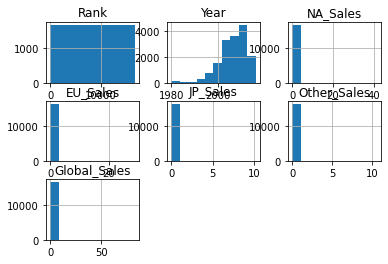

In [9]:
df.hist()

# What  genre has been produced the most

In [10]:
df["Genre"].value_counts()

Action          3315
Sports          2346
Misc            1739
Role-Playing    1486
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       866
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

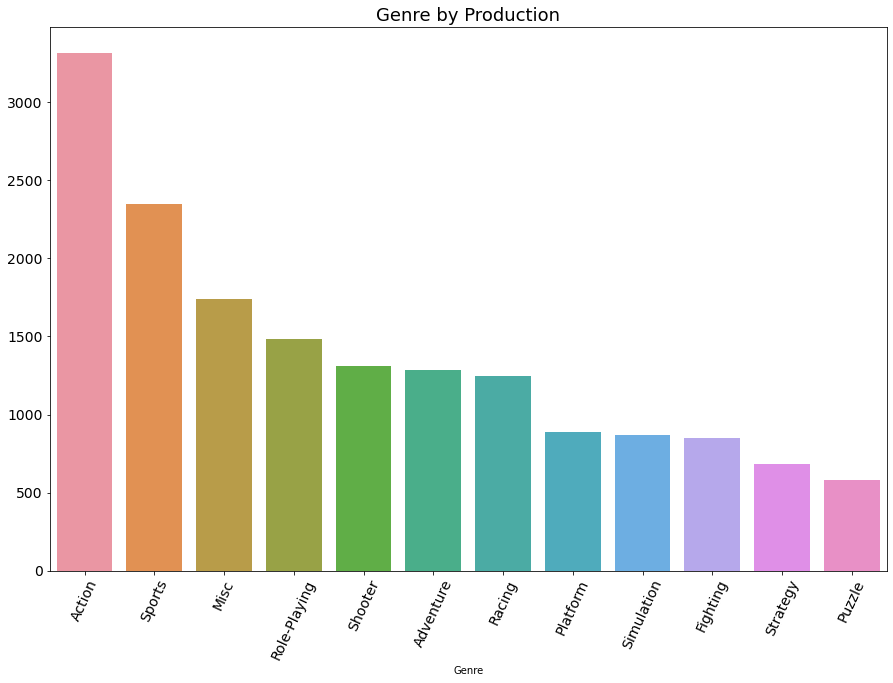

In [11]:
plt.figure(figsize=(15, 10))

sns.countplot(x=df["Genre"], order=df["Genre"].value_counts().index, data=df)

plt.title("Genre by Production", fontsize=18)
plt.xlabel("Genre")
plt.xticks(fontsize=14, rotation=65)
plt.ylabel("")
plt.yticks(fontsize=14)

plt.show()

# Which Genre has the most Global Sales

           Genre  Global_Sales
0         Action       1751.17
1         Sports       1330.93
2        Shooter       1037.37
3   Role-Playing        927.33
4       Platform        831.37
5           Misc        809.96
6         Racing        732.04
7       Fighting        448.91
8     Simulation        391.91
9         Puzzle        244.95
10     Adventure        239.04
11      Strategy        175.12


<function matplotlib.pyplot.show(close=None, block=None)>

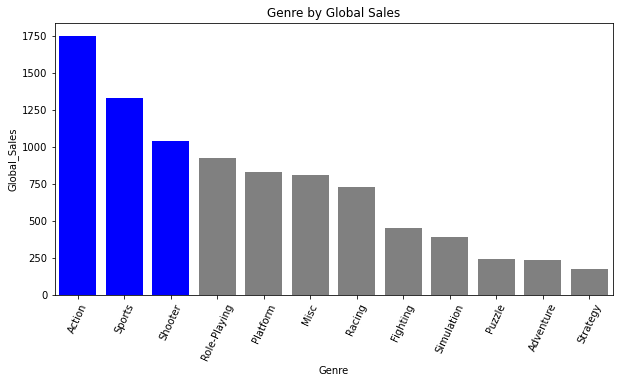

In [12]:
# group data 
df_global_sales = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)
df_global_sales = df_global_sales.reset_index()
print(df_global_sales)

fig = plt.figure(figsize=(10,5))

# create plot
plot = sns.barplot(x=df_global_sales["Genre"], y=df_global_sales["Global_Sales"], data=df_global_sales, color="grey")

#customize plot
plt.title("Genre by Global Sales")
plt.xticks(rotation=65)

# make the top three games blue
for i in range(3):
    plot.patches[i].set_facecolor("blue")

# show the plot    
plt.show

# Which year had the most releases?

In [13]:
df["Year"].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: Year, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2001.0'),
  Text(15, 0, '1998.0'),
  Text(16, 0, '2000.0'),
  Text(17, 0, '2016.0'),
  Text(18, 0, '1999.0'),
  Text(19, 0, '1997.0'),
  Text(20, 0, '1996.0'),
  Text(21, 0, '1995.0'),
  Text(22, 0, '1994.0'),
  Text(23, 0, '1993.0'),
  Text(24, 0, '1981.0'),
  Text(25, 0, '1992.0'),
  Text(26, 0, '1991.0'),
  Text(27, 0, '1982.0'),
  Text(28, 0, '1986.0'),
  Text(29, 0, '1983.0'),
  Text(30, 0, '1989.0'),
  Text(31, 0, '1990.0'),
  Text(32, 0, '1987.0'),
  Text(33, 

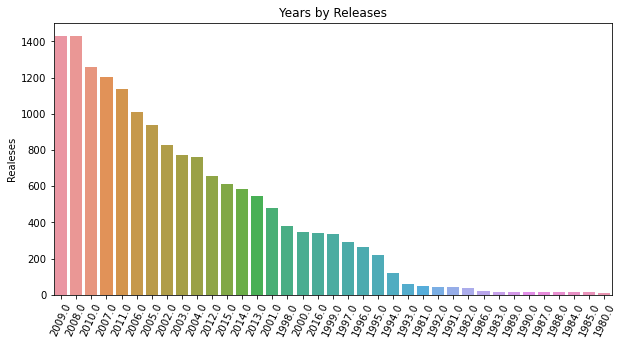

In [14]:
fig = plt.figure(figsize=(10,5))

sns.countplot(x=df["Year"], order=df["Year"].value_counts().index, data=df)

plt.title("Years by Releases")
plt.ylabel("Realeses")
plt.xlabel("")
plt.xticks(rotation=65)

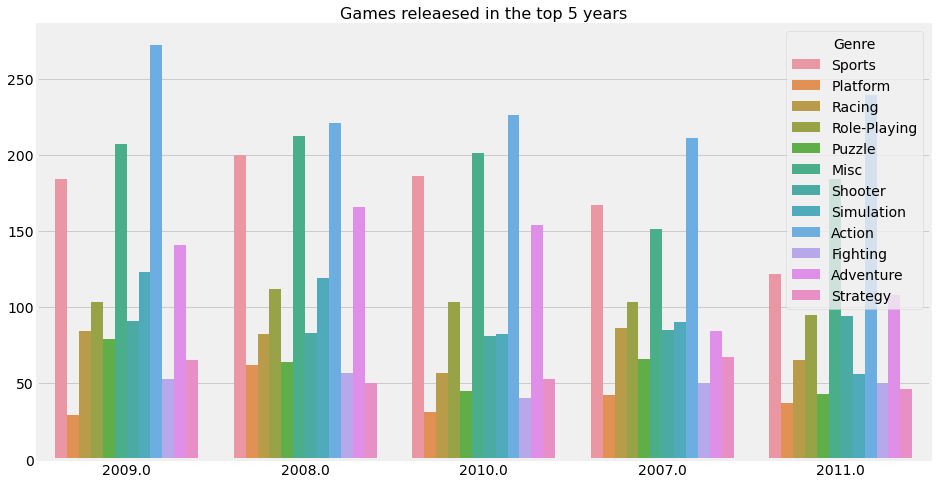

In [15]:
fig = plt.figure(figsize=(16,8))

style = "fivethirtyeight"

with plt.style.context(style):
    sns.countplot(x="Year", hue="Genre", order=df.Year.value_counts().iloc[:5].index, data=df)

plt.title("Games releaesed in the top 5 years", fontsize=16)
plt.ylabel("")
plt.xlabel("")
plt.xticks(fontsize=14)

plt.show()

# Which Year has the most Global Sales

In [16]:
df_global_sales_by_year = df.groupby("Year")["Global_Sales"].sum().sort_values(ascending=False)
df_global_sales_by_year = df_global_sales_by_year.reset_index()
print(df_global_sales_by_year)

      Year  Global_Sales
0   2008.0        678.90
1   2009.0        667.30
2   2007.0        611.13
3   2010.0        600.45
4   2006.0        521.04
5   2011.0        515.99
6   2005.0        459.94
7   2004.0        419.31
8   2002.0        395.52
9   2013.0        368.11
10  2012.0        363.54
11  2003.0        357.85
12  2014.0        337.05
13  2001.0        331.47
14  2015.0        264.44
15  1998.0        256.47
16  1999.0        251.27
17  2000.0        201.56
18  1997.0        200.98
19  1996.0        199.15
20  1995.0         88.11
21  1994.0         79.17
22  1992.0         76.16
23  1989.0         73.45
24  2016.0         70.93
25  1985.0         53.94
26  1984.0         50.36
27  1990.0         49.39
28  1988.0         47.22
29  1993.0         45.98
30  1986.0         37.07
31  1981.0         35.77
32  1991.0         32.23
33  1982.0         28.86
34  1987.0         21.74
35  1983.0         16.79
36  1980.0         11.38


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  Text(33, 

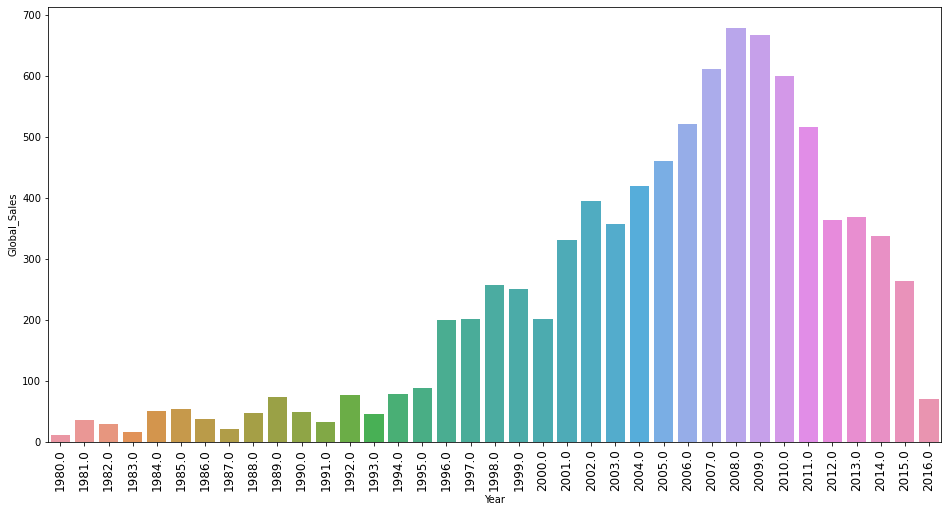

In [17]:
fig = plt.figure(figsize=(16,8))

sns.barplot(x=df_global_sales_by_year.Year, y=df_global_sales_by_year.Global_Sales, data=df_global_sales_by_year)

plt.xticks(fontsize=12, rotation=90)

# Which genre game has the most global sales by year?

In [18]:
year_genre_sales = df.groupby(['Year', 'Genre'])['Global_Sales'].sum()

# find the index of the maximum sales for each year
idx = year_genre_sales.groupby(level=0).idxmax()

# extract the rows with the maximum sales for each year
year_genre_sales_max = year_genre_sales.loc[idx]

# reset the index to turn the multi-index into columns
year_genre_sales_max = year_genre_sales_max.reset_index()

# print the result
print(year_genre_sales_max)

      Year         Genre  Global_Sales
0   1980.0       Shooter          7.07
1   1981.0        Action         14.84
2   1982.0        Puzzle         10.03
3   1983.0      Platform          6.93
4   1984.0       Shooter         31.10
5   1985.0      Platform         43.17
6   1986.0        Action         13.74
7   1987.0      Fighting          5.42
8   1988.0      Platform         27.73
9   1989.0        Puzzle         37.75
10  1990.0      Platform         22.97
11  1991.0      Platform          7.64
12  1992.0      Fighting         15.25
13  1993.0      Platform         18.67
14  1994.0      Platform         28.74
15  1995.0      Platform         16.69
16  1996.0  Role-Playing         43.96
17  1997.0        Racing         31.91
18  1998.0        Sports         41.79
19  1999.0  Role-Playing         49.09
20  2000.0        Sports         41.19
21  2001.0        Action         59.39
22  2002.0        Action         86.77
23  2003.0        Action         67.93
24  2004.0        Action 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  Text(33, 

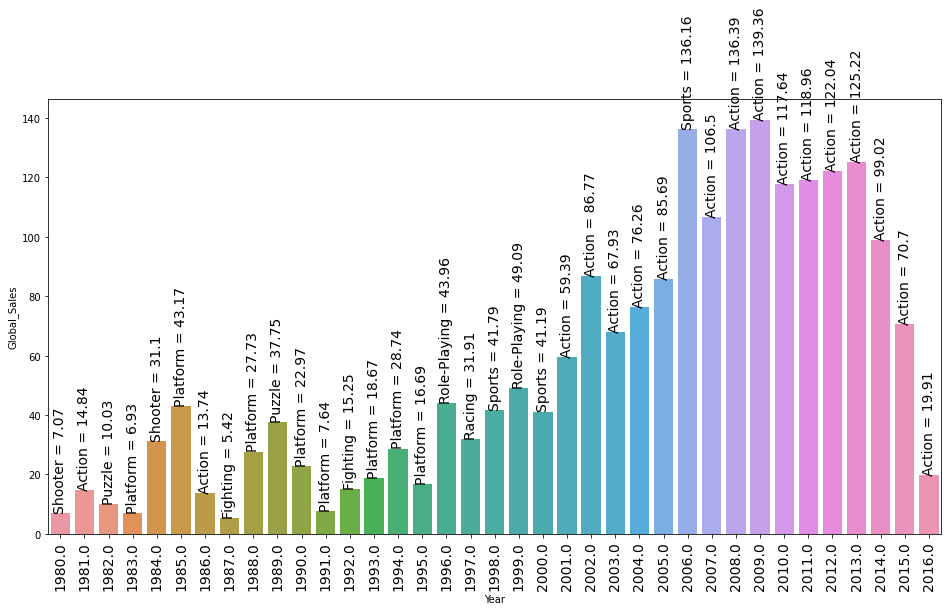

In [19]:
fig = plt.figure(figsize=(16,8))

plot = sns.barplot(x=year_genre_sales_max.Year, y=year_genre_sales_max.Global_Sales, data=year_genre_sales_max)

index=0
genre=year_genre_sales_max["Genre"]

for value in year_genre_sales_max["Global_Sales"]:
    plot.text(index, value + 1, str(genre[index] + " = " + str(round(value, 2))), color="black", fontsize=14,
             rotation=90, ha="center")
    index +=1

plt.xticks(fontsize=14, rotation=90)

# Which game has the most releases in a year?

In [20]:
# group the data by year and genre and count the number of games in each group
year_genre_count = df.groupby(['Year', 'Genre']).size().reset_index(name='count')


year_max_genre = year_genre_count.groupby(['Year', 'Genre'])['count'].sum().reset_index()

# extract the rows with the maximum sales for each year
idx = year_max_genre.groupby('Year')['count'].transform(max) == year_max_genre['count']

# reset the index and remove duplicates to turn the multi-index into columns
year_max_genre = year_max_genre[idx].drop_duplicates(subset=["Year"]).reset_index(drop=True)

print(year_max_genre)

      Year     Genre  count
0   1980.0      Misc      4
1   1981.0    Action     25
2   1982.0    Action     18
3   1983.0    Action      7
4   1984.0    Puzzle      3
5   1985.0  Platform      4
6   1986.0    Action      6
7   1987.0    Sports      4
8   1988.0  Platform      4
9   1989.0    Puzzle      5
10  1990.0    Action      3
11  1991.0    Sports      7
12  1992.0  Fighting      7
13  1993.0  Fighting     11
14  1994.0  Fighting     22
15  1995.0  Fighting     29
16  1996.0    Sports     52
17  1997.0    Sports     46
18  1998.0    Sports     70
19  1999.0    Sports     62
20  2000.0    Sports     81
21  2001.0    Sports     96
22  2002.0    Sports    188
23  2003.0    Action    144
24  2004.0    Action    125
25  2005.0    Action    192
26  2006.0    Action    184
27  2007.0    Action    211
28  2008.0    Action    221
29  2009.0    Action    272
30  2010.0    Action    226
31  2011.0    Action    239
32  2012.0    Action    266
33  2013.0    Action    148
34  2014.0    Action

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  Text(33, 

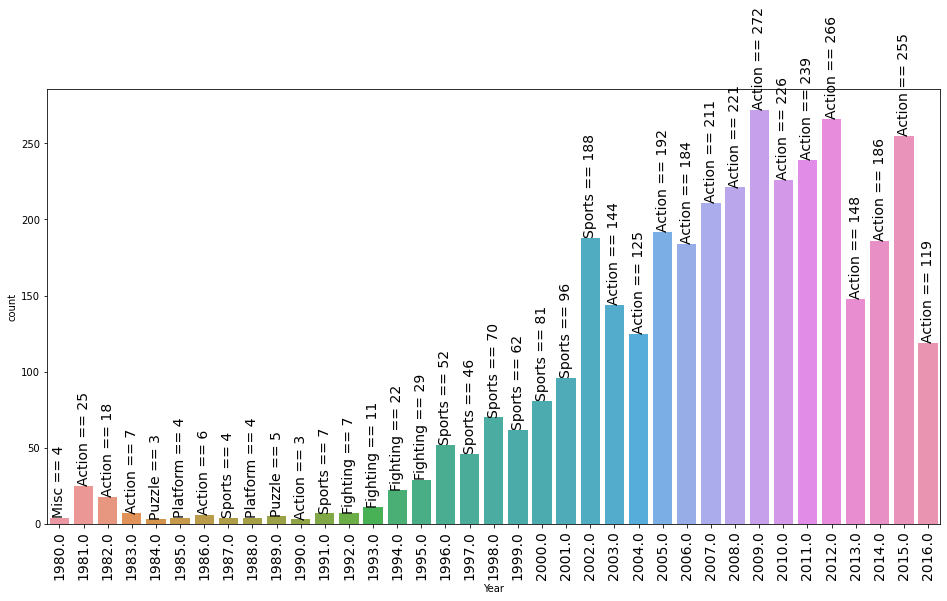

In [21]:
fig = plt.figure(figsize=(16,8))

plot = sns.barplot(x=year_max_genre["Year"], y=year_max_genre["count"], data=year_max_genre)

index = 0
genre = year_max_genre["Genre"]


for value in year_max_genre['count'].values:
    plot.text(index, value + 2, str(genre[index] + " == " +str(value)), 
              color='#000', size=14, rotation= 90, ha="center") 
    index+=1
    
plt.xticks(fontsize=14, rotation=90)

# Which Platform has the highest sales 

   Platform  Global_Sales
0       PS2       1255.64
1      X360        979.96
2       PS3        957.84
3       Wii        926.71
4        DS        822.20
5        PS        730.66
6       GBA        318.50
7       PSP        296.28
8       PS4        278.07
9        PC        258.82
10       XB        258.26
11       GB        255.45
12      NES        251.07
13      3DS        247.46
14      N64        218.88
15     SNES        200.05
16       GC        199.36
17     XOne        141.06
18     2600         97.08
19     WiiU         81.86
20      PSV         61.91
21      SAT         33.59
22      GEN         28.36
23       DC         15.97
24      SCD          1.87
25       NG          1.44
26       WS          1.42
27     TG16          0.16
28      3DO          0.10
29       GG          0.04
30     PCFX          0.03


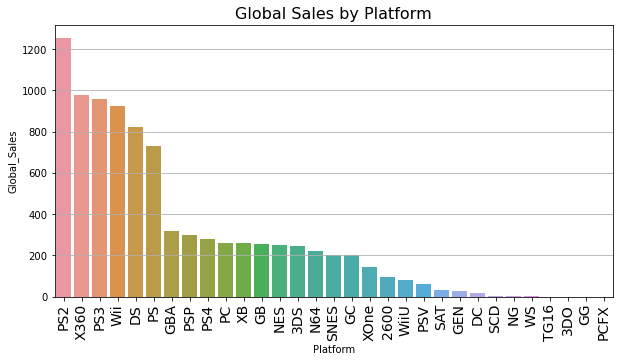

In [22]:
sales_by_platform = df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False)
sales_by_platform = sales_by_platform.reset_index()
print(sales_by_platform)

fig = plt.figure(figsize=(10,5))

sns.barplot(x=sales_by_platform.Platform, y=sales_by_platform.Global_Sales, data=sales_by_platform)

plt.title("Global Sales by Platform", fontsize=16)
plt.xticks(rotation=90, fontsize=14)
plt.grid(axis="y")

# Which game has the greatest Global Sales

In [23]:
sales_by_game = df.groupby("Name")["Global_Sales"].sum().sort_values(ascending=False).head(20)
sales_by_game = sales_by_game.reset_index()
print(sales_by_game)

                              Name  Global_Sales
0                       Wii Sports         82.74
1               Grand Theft Auto V         55.92
2                Super Mario Bros.         45.31
3                           Tetris         35.84
4                   Mario Kart Wii         35.82
5                Wii Sports Resort         33.00
6         Pokemon Red/Pokemon Blue         31.37
7          Call of Duty: Black Ops         31.03
8   Call of Duty: Modern Warfare 3         30.83
9            New Super Mario Bros.         30.01
10      Call of Duty: Black Ops II         29.72
11                        Wii Play         29.02
12       New Super Mario Bros. Wii         28.62
13                       Duck Hunt         28.31
14            Call of Duty: Ghosts         27.38
15               Super Mario World         26.07
16       Call of Duty: Black Ops 3         25.32
17  Call of Duty: Modern Warfare 2         25.09
18                      Nintendogs         24.76
19   Grand Theft Aut

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Wii Sports'),
  Text(1, 0, 'Grand Theft Auto V'),
  Text(2, 0, 'Super Mario Bros.'),
  Text(3, 0, 'Tetris'),
  Text(4, 0, 'Mario Kart Wii'),
  Text(5, 0, 'Wii Sports Resort'),
  Text(6, 0, 'Pokemon Red/Pokemon Blue'),
  Text(7, 0, 'Call of Duty: Black Ops'),
  Text(8, 0, 'Call of Duty: Modern Warfare 3'),
  Text(9, 0, 'New Super Mario Bros.'),
  Text(10, 0, 'Call of Duty: Black Ops II'),
  Text(11, 0, 'Wii Play'),
  Text(12, 0, 'New Super Mario Bros. Wii'),
  Text(13, 0, 'Duck Hunt'),
  Text(14, 0, 'Call of Duty: Ghosts'),
  Text(15, 0, 'Super Mario World'),
  Text(16, 0, 'Call of Duty: Black Ops 3'),
  Text(17, 0, 'Call of Duty: Modern Warfare 2'),
  Text(18, 0, 'Nintendogs'),
  Text(19, 0, 'Grand Theft Auto: San Andreas')])

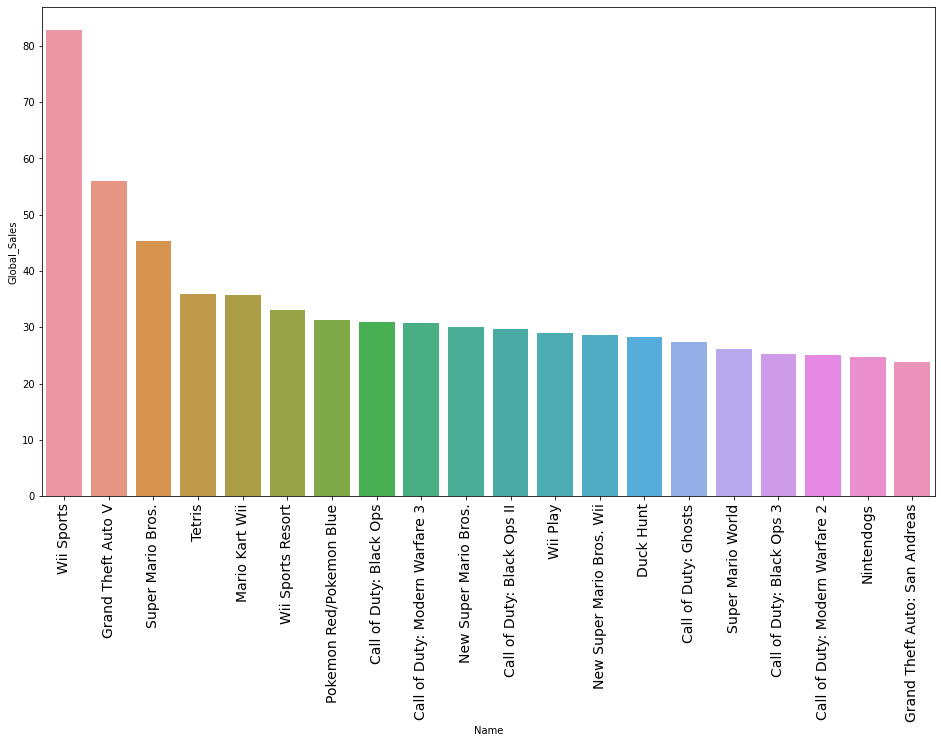

In [24]:
fig = plt.figure(figsize=(16,9))

sns.barplot(x=sales_by_game.Name, y=sales_by_game.Global_Sales, data=sales_by_game)

plt.xticks(rotation=90, fontsize=14)

# Sales comparison by genre

In [25]:
# grouping the sales by genre
sales_by_genre = df.groupby("Genre")[["Global_Sales", "EU_Sales","JP_Sales", "NA_Sales", "Other_Sales"]].sum()
print(sales_by_genre)

              Global_Sales  EU_Sales  JP_Sales  NA_Sales  Other_Sales
Genre                                                                
Action             1751.17    525.00    159.94    877.83       187.38
Adventure           239.04     64.13     52.07    105.80        16.81
Fighting            448.91    101.32     87.35    223.59        36.68
Misc                809.96    215.98    107.76    410.24        75.32
Platform            831.37    201.63    130.77    447.05        51.59
Puzzle              244.95     50.78     57.31    123.78        12.55
Racing              732.04    238.39     56.69    359.42        77.27
Role-Playing        927.33    188.06    352.27    327.28        59.61
Shooter            1037.37    313.27     38.28    582.60       102.69
Simulation          391.91    113.38     63.70    183.04        31.50
Sports             1330.93    376.85    135.37    683.35       134.97
Strategy            175.12     45.34     49.46     68.70        11.36


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'Action'),
  Text(0, 1.5, 'Adventure'),
  Text(0, 2.5, 'Fighting'),
  Text(0, 3.5, 'Misc'),
  Text(0, 4.5, 'Platform'),
  Text(0, 5.5, 'Puzzle'),
  Text(0, 6.5, 'Racing'),
  Text(0, 7.5, 'Role-Playing'),
  Text(0, 8.5, 'Shooter'),
  Text(0, 9.5, 'Simulation'),
  Text(0, 10.5, 'Sports'),
  Text(0, 11.5, 'Strategy')])

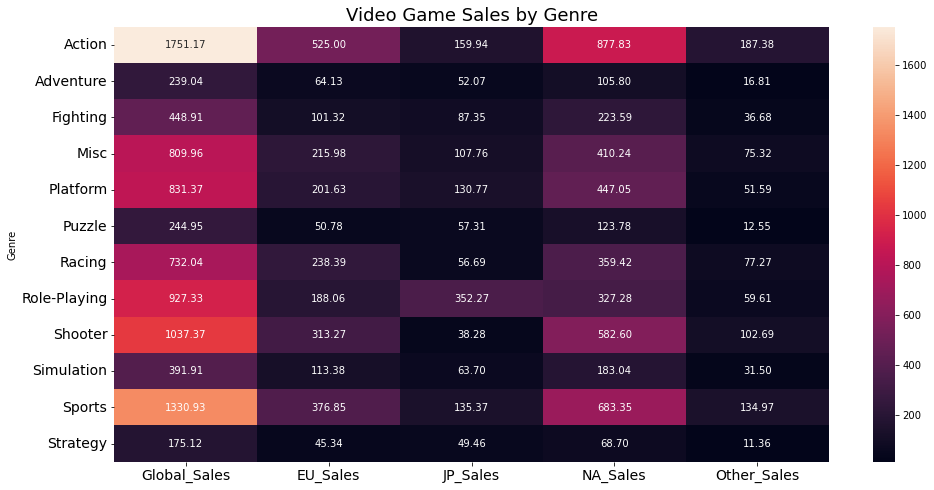

In [26]:
fig = plt.figure(figsize=(16,8))

sns.heatmap(data=sales_by_genre, annot=True, fmt=".2f")

plt.title("Video Game Sales by Genre", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Which Publisher have the most releases

In [27]:
df["Publisher"].value_counts().head(20)

Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    920
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       637
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Midway Games                               198
Eidos Interactive                          198
505 Games                                  192
Name: Publisher, dtype: int64

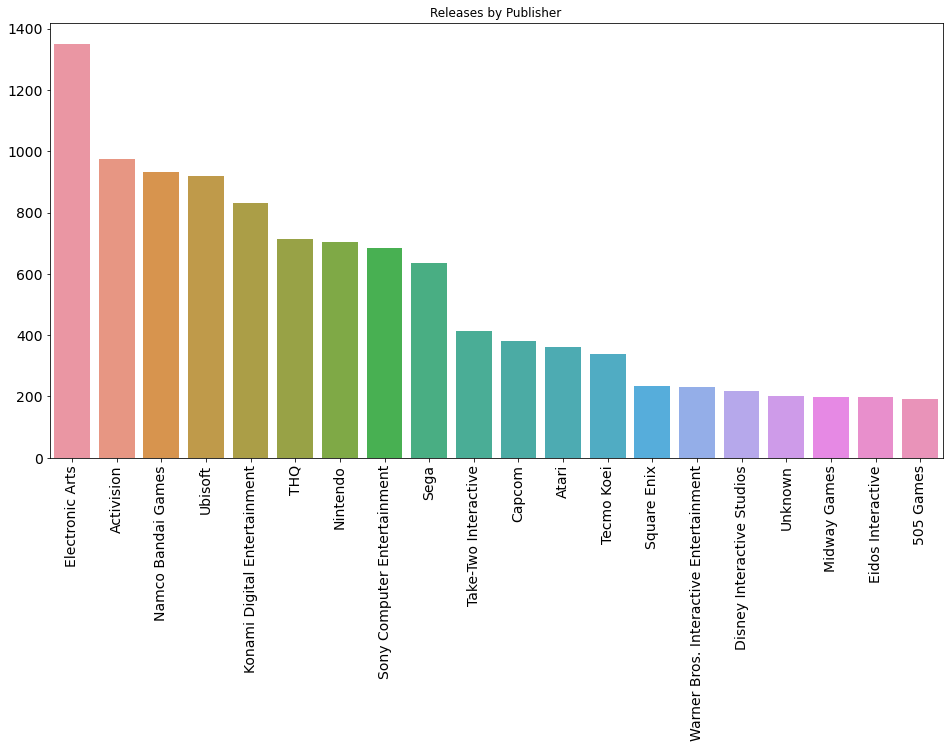

In [28]:
fig = plt.figure(figsize=(16,8))

sns.countplot(x=df["Publisher"], order=df["Publisher"].value_counts().head(20).index, data=df)

plt.title("Releases by Publisher")
plt.xlabel("")
plt.xticks(rotation=90, fontsize=14)
plt.ylabel("")
plt.yticks(fontsize=14)

plt.show()

# Global Sales by Publisher

In [29]:
sales_by_publisher = df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(20)
sales_by_publisher = sales_by_publisher.reset_index()
print(sales_by_publisher)

                                 Publisher  Global_Sales
0                                 Nintendo       1786.56
1                          Electronic Arts       1110.32
2                               Activision        727.46
3              Sony Computer Entertainment        607.50
4                                  Ubisoft        474.43
5                     Take-Two Interactive        399.54
6                                      THQ        340.77
7             Konami Digital Entertainment        283.64
8                                     Sega        272.95
9                       Namco Bandai Games        254.09
10                  Microsoft Game Studios        245.79
11                                  Capcom        200.89
12                                   Atari        157.22
13  Warner Bros. Interactive Entertainment        153.89
14                             Square Enix        145.18
15              Disney Interactive Studios        119.96
16                       Eidos 

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

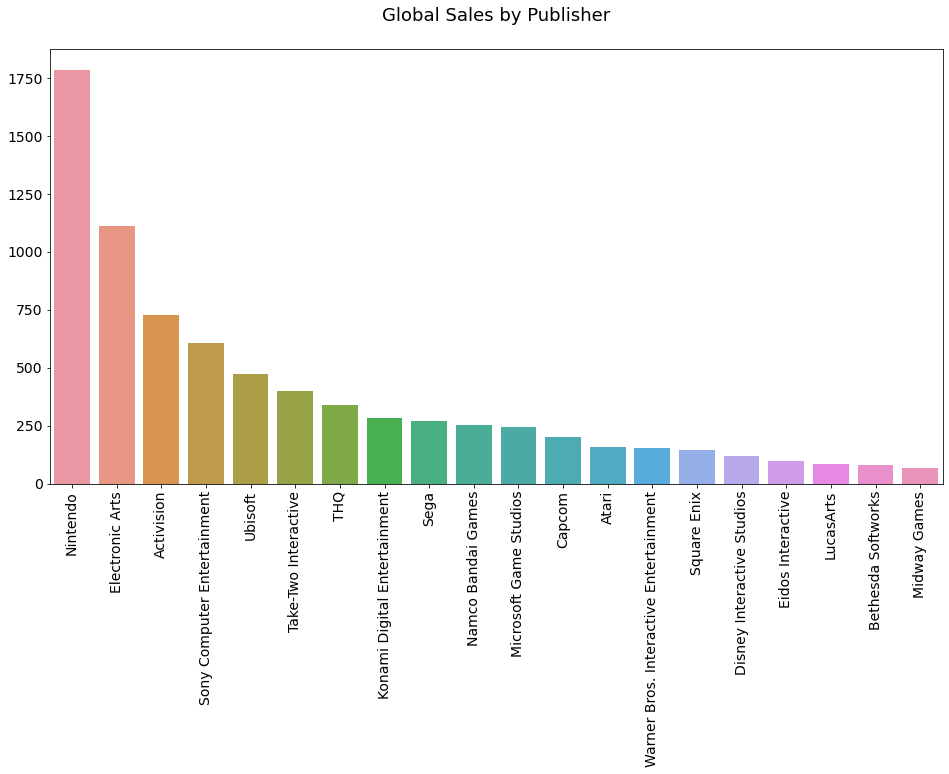

In [30]:
fig = plt.figure(figsize=(16,8))

sns.barplot(x="Publisher", y="Global_Sales", data=sales_by_publisher)

plt.title("Global Sales by Publisher", fontsize=18, y=1.05) # adjust the hightof the titel  with y 
plt.xlabel("")
plt.xticks(rotation=90, fontsize=14)
plt.ylabel("")
plt.yticks(fontsize=14)

# Most Releases per year by Publisher

In [31]:
publisher_release_year = df.groupby(["Publisher", "Year"]).size().reset_index(name="count").sort_values(by="count", ascending=False)
publisher_release_year = publisher_release_year.reset_index()
print(publisher_release_year)

      index        Publisher    Year  count
0       114       Activision  2009.0    121
1       659  Electronic Arts  2008.0    120
2       656  Electronic Arts  2005.0    117
3      2142          Ubisoft  2008.0    112
4       660  Electronic Arts  2009.0    112
...     ...              ...     ...    ...
2313   1082  Kadokawa Shoten  1997.0      1
2314   1081  Kadokawa Shoten  1996.0      1
2315   1076   Kadokawa Games  2012.0      1
2316   1075              KSS  1996.0      1
2317   2317     responDESIGN  2005.0      1

[2318 rows x 4 columns]


In [39]:
# get the max value of each year
publisher_release_year = publisher_release_year.loc[publisher_release_year.groupby("Year")["count"].idxmax()]

# drop duplicates baesd on year
publisher_release_year = publisher_release_year.drop_duplicates(subset=["Year"], keep="last")
publisher_release_year  = publisher_release_year.reset_index()
print(publisher_release_year)

    level_0  index                     Publisher    Year  count
0       629     90                    Activision  1980.0      5
1       358    226                         Atari  1981.0     11
2       285    227                         Atari  1982.0     14
3       545    228                         Atari  1983.0      6
4       412   1470                      Nintendo  1984.0      9
5       523   1471                      Nintendo  1985.0      7
6       541   1472                      Nintendo  1986.0      6
7       738   1473                      Nintendo  1987.0      4
8       566   1474                      Nintendo  1988.0      6
9       420   1475                      Nintendo  1989.0      9
10      524   1476                      Nintendo  1990.0      7
11      318   1477                      Nintendo  1991.0     13
12      404   1478                      Nintendo  1992.0     10
13      417   1479                      Nintendo  1993.0      9
14      161   1761                      

In [45]:
publisher_release_year = publisher_release_year.drop(["level_0", "index"], axis=1)


In [46]:
print(publisher_release_year)

                       Publisher    Year  count
0                     Activision  1980.0      5
1                          Atari  1981.0     11
2                          Atari  1982.0     14
3                          Atari  1983.0      6
4                       Nintendo  1984.0      9
5                       Nintendo  1985.0      7
6                       Nintendo  1986.0      6
7                       Nintendo  1987.0      4
8                       Nintendo  1988.0      6
9                       Nintendo  1989.0      9
10                      Nintendo  1990.0      7
11                      Nintendo  1991.0     13
12                      Nintendo  1992.0     10
13                      Nintendo  1993.0      9
14                          Sega  1994.0     26
15   Sony Computer Entertainment  1995.0     31
16   Sony Computer Entertainment  1996.0     28
17   Sony Computer Entertainment  1997.0     34
18   Sony Computer Entertainment  1998.0     30
19  Konami Digital Entertainment  1999.0

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

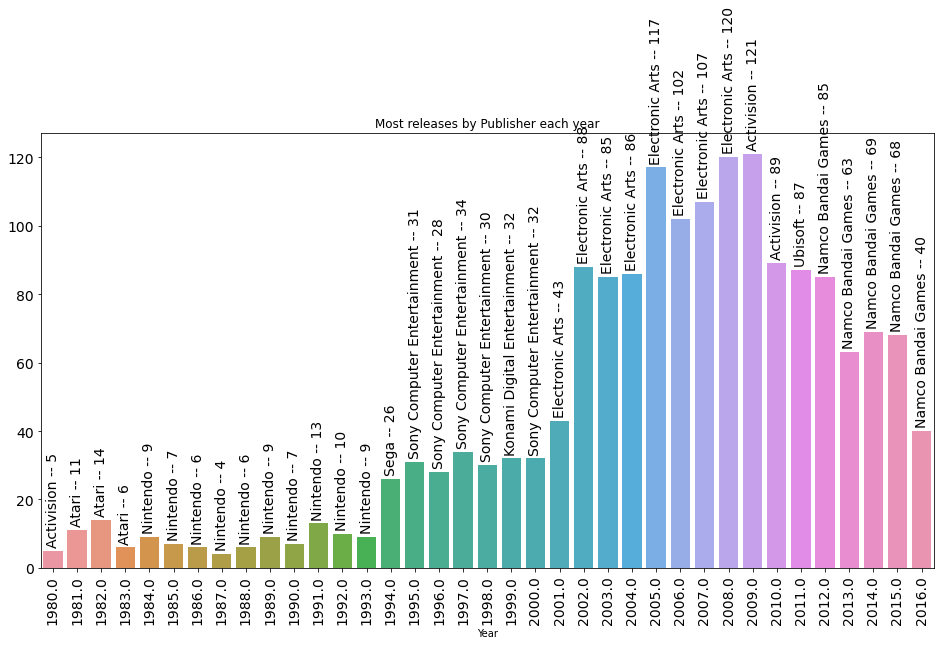

In [52]:
fig = plt.figure(figsize=(16,8))

plot = sns.barplot(x="Year", y="count", data=publisher_release_year)

index = 0 
publisher = publisher_release_year["Publisher"]

for value in publisher_release_year['count'].values:
    plot.text(index, value + 2, str(publisher[index] + " -- " +str(value)), 
              color='black', size=14, rotation= 90, ha="center") 
    index+=1

    

plt.title("Most releases by Publisher each year")
plt.xticks(rotation=90, fontsize=14)
plt.ylabel("")
plt.yticks(fontsize=14)